**END TO END ML PROJECT ( REAL ESTATE HOUSING PRIDICTION)**


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [185]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data (6).csv
User uploaded file "data.csv" with length 35177 bytes


In [186]:
housing = pd.read_csv("data.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [187]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [189]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [190]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [192]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00a00fa8d0>,
      dtype=object)

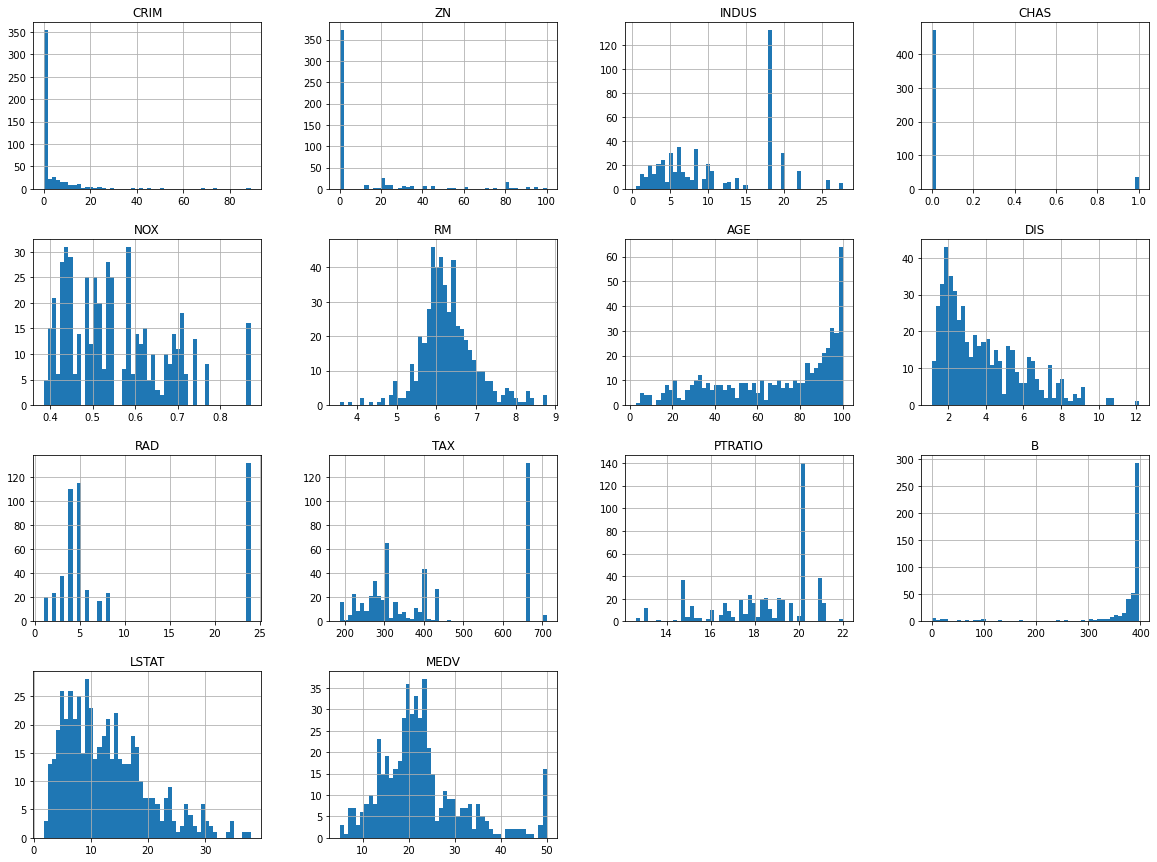

In [191]:
housing.hist(bins=50, figsize=(20, 15))

**Train-Test Spillting**

In [113]:
def spilt_train_test(data, test_ratio):
  np.random.seed(42)
  shuffled = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices=shuffled[:test_set_size]
  tain_indices=shuffled[test_set_size:]
  return data.iloc[tain_indices],data.iloc[test_indices]

In [94]:
# train_set,test_set = spilt_train_test(housing, 0.2)
# print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}\n")

In [193]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2 ,random_state=42)
print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}\n")

Rows in train set : 404
Rows in test set : 102



**Before Stratified Sampling :**

In [194]:
train_set['CHAS'].value_counts()

0    375
1     29
Name: CHAS, dtype: int64

In [195]:
test_set['CHAS'].value_counts()

0    96
1     6
Name: CHAS, dtype: int64

**Stratified Sampling**

In [196]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


**After Stratified Sampling**

In [197]:
 strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [198]:
 strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [199]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [200]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [201]:
housing = strat_train_set.copy()

**Correlation :**

In [202]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f009ddf6630>,
      dtype=object)

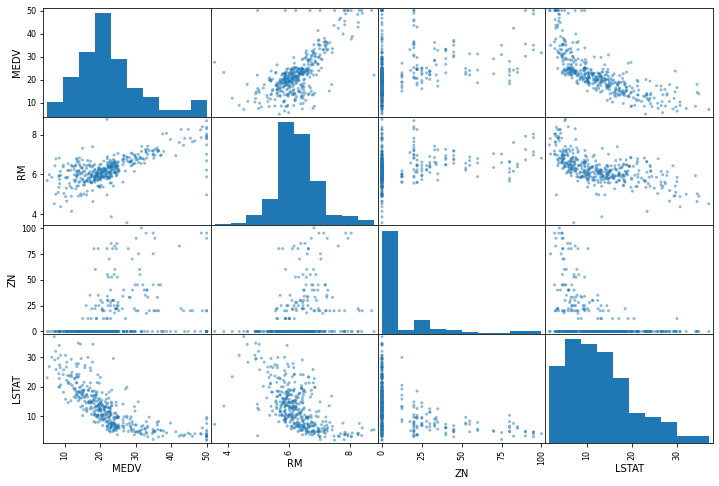

In [203]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

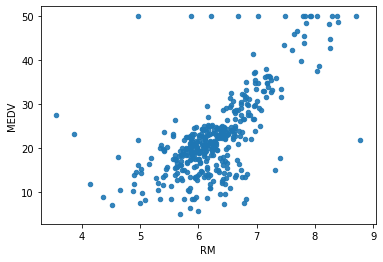

In [204]:
 housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.9)

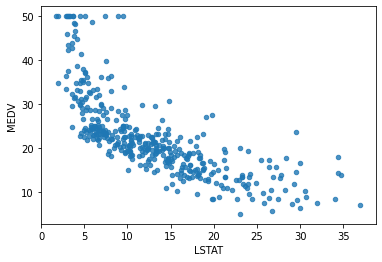

In [205]:
 housing.plot(kind="scatter", x="LSTAT", y="MEDV", alpha=0.8)

**Attribute Combination :**

In [206]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [207]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


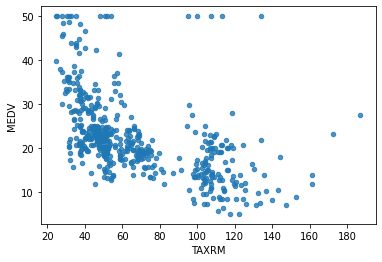

In [122]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [208]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

**Missing Attributes :**

**To take care of missing attributes, you have three options:**
1. Get rid of the missing data point
2. Get rid of the whole attribute
3. Set the value to some value(0, mean or median)

In [209]:
a = housing.dropna(subset=["RM"]) #Option 1
a.shape

(399, 13)

In [210]:
median = housing["RM"].median()

In [211]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [212]:
housing.shape

(404, 13)

In [234]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [235]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [236]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

**Sciket-Learn Design :**

**Primmarily, three types of objects :**

1. Estimators - It estimates some paramters based on a dataset. Eg. imputer. It has a fit mathod and transform method.Fit method - Fits dataset and calculates internal parameters.

2. Transformers - Transform method takes input and returns output based on the learning from fit().It has also a convenience function called fit_transform()which fits and then transform.
4. Predictors - linearRegression is the an example of predictor.fit() and predict() are two common function. it also gives score() function which will evaluate the predictions.

**Feature Scaling :**

Primmarily, three types of objects :
1. Min-max scaling (Normalization) (Value - min)/(max - min)
2. Standardization (Value - mean)/std

In [221]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


**PIPELINE :**

In [237]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])


In [238]:
housing_new = my_pipeline.fit_transform(housing)

In [239]:
housing_new.shape

(404, 13)

**Selecting a Desired Model for Real_Estate :**

In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_new, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [241]:
pridiction_some_data = housing.iloc[:5]
pridiction_some_labels = housing_labels.iloc[5:]

In [242]:
preparedata = my_pipeline.transform(pridiction_some_data)

In [243]:
model.predict(preparedata)

array([22.276, 25.186, 16.523, 23.323, 23.66 ])

In [ ]:
list(pridiction_some_labels )

## Evaluating the model

In [247]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_new)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
rmse

1.2088865079522184

## Using better evaluation technique - Cross Validation

In [250]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_new, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [251]:
rmse_scores

array([2.81280217, 2.64831291, 4.44185089, 2.59301272, 3.25912588,
       2.77527397, 5.12649873, 3.41467061, 3.0952778 , 3.38821113])

In [252]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [253]:
print_scores(rmse_scores)

Scores: [2.81280217 2.64831291 4.44185089 2.59301272 3.25912588 2.77527397
 5.12649873 3.41467061 3.0952778  3.38821113]
Mean:  3.355503680907204
Standard deviation:  0.7817194595600057


**SAVE MODEL**

In [254]:
from joblib import dump, load
dump(model, 'REAL_ESTATE.joblib') 

['REAL_ESTATE.joblib']

In [256]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[24.887 11.653 25.452 21.48  18.64  15.108 19.791 14.164 32.05  42.658
 19.713 12.349 25.551 27.6   19.498 11.434 31.608 14.284 23.388 19.056
 20.05  17.418 19.645 22.002 18.516 30.466 15.996 32.516  8.51  33.531
 23.039 21.238 22.667 10.917 21.173 11.402 43.59  24.566 23.325 42.006
 24.066 30.283 20.196 21.03  18.786 32.882 44.922 20.366 20.575 21.281
 21.209 14.422 20.997 14.731 25.217 32.647 43.208 28.729 19.364 20.815
 46.96   9.201 19.275 25.814 14.671 33.296 19.869 17.935 19.126 33.7
 25.952 22.607 20.952 22.778 33.934 13.355 15.809 20.127 20.874 21.646
 22.431 21.317 14.201 22.509 20.31  21.256 13.962 20.956 21.399 23.768
 18.742 26.823  7.353 25.814 19.712 29.578 19.838 30.89  14.498 26.742
 21.496 20.816] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 

In [257]:
final_rmse

2.955231026767385

In [260]:
from joblib import dump, load
import numpy as np
model = load('REAL_ESTATE.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([22.996])

Model Outputs 
1. Decision Tree =
    Mean:  4.189504502474483
    Standard deviation:  0.848096620323756

2. Linear Regression =
    Mean:  4.221894675406022
    Standard deviation:  0.7520304927151625

3. Random Forest Regression =
    Mean:  3.494650261111624
    Standard deviation:  0.762041223886678